In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Hough transform example 1

Start by making an image consisting of 5 points.

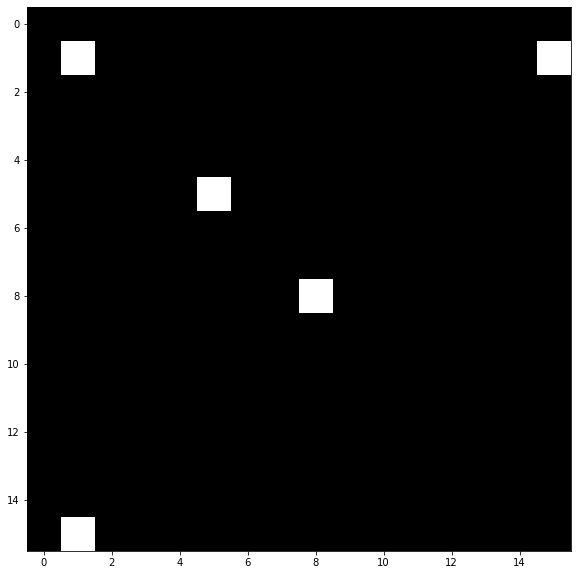

In [2]:
im=np.zeros([16,16])
im[1,1]=1;
im[5,5]=1;
im[8,8]=1;
im[1,15]=1;
im[15,1]=1;
plt.figure(figsize=(10, 10))
plt.imshow(im, cmap='gray')
plt.show()

The question is, are these point on no, one or multiple lines? That is, is there any line y=ax+b that passes through at least 3 of these points for some values of a and b?

To investigate this, let's first take the [x,y] coordinates of every point in the given image and plug it into the equation b=-xa+y (note that [x,y] should be parameters in this equation), and then vary a over some predefined interval (we will use integers between -5 and 5). This would produce lines in terms of a and b, and we will visualise these lines.

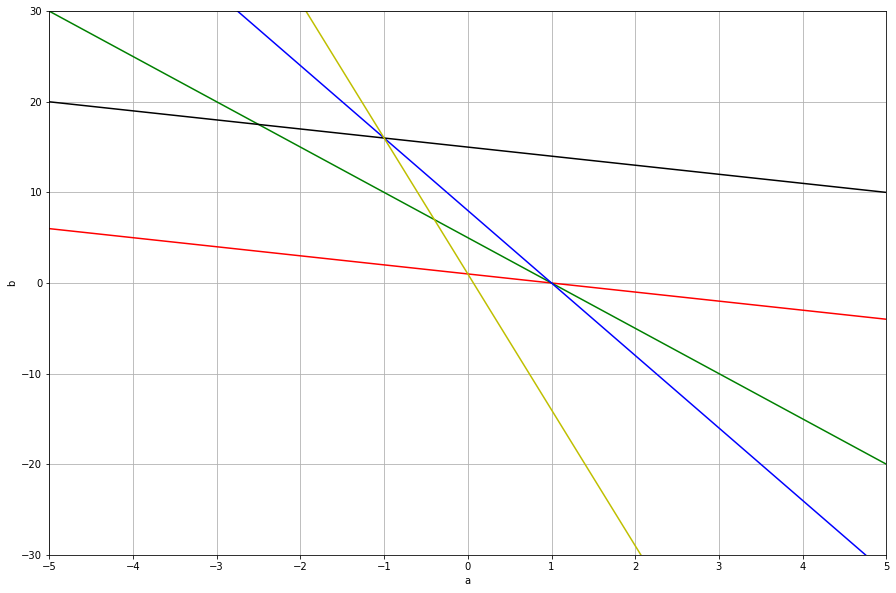

In [3]:
plt.figure(figsize=(15, 10))

# Point 1, x=1, y=1, b=-a+1
a=np.arange(-5,6,1)
b=-a+1
plt.plot(a,b,'r')

# Point 2, x=5, y=5, b=-5a+5
a=np.arange(-5,6,1)
b=-5*a+5
plt.plot(a,b,'g')

# Point 3, x=8, y=8, b=-8a+8
a=np.arange(-5,6,1)
b=-8*a+8
plt.plot(a,b,'b')

# Point 4, x=1, y=15; b=-a+15
a=np.arange(-5,6,1)
b=-a+15
plt.plot(a,b,'k')

# Point 5 x=15, y=1; b=-15a + 1
a=np.arange(-5,6,1)
b=-15*a+1
plt.plot(a,b,'y')

plt.grid()
plt.axis([-5, 5, -30, 30])
plt.xlabel('a')
plt.ylabel('b')
plt.xticks(np.arange(-5, 6, 1))
plt.show()

So it appears that the points form two lines, one with parameters a=1 and b=0, the other with parameters a=-1 and b=16. This could be visually verified by looking at the image of the points. It could also be interpreted directly from the [x,y] coordinates of the 5 points.

Let's now look at how the accumulator matrix looks like when using the Cartesian representation. We will quantize a as integers between -5 and 5 and b as integers between -100 and 100.

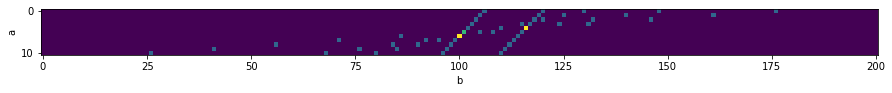

[[0. 0. 0. 0. 1.]
 [0. 0. 0. 2. 0.]
 [0. 0. 3. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]
 [0. 0. 3. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [4]:
acc=np.zeros([11,201])

a=np.arange(-5,6,1)
b=-a+1
for x in range(a.size):
    acc[a[x]+5,b[x]+100]=acc[a[x]+5,b[x]+100]+1

a=np.arange(-5,6,1)
b=-5*a+5
for x in range(a.size):
    acc[a[x]+5,b[x]+100]=acc[a[x]+5,b[x]+100]+1

a=np.arange(-5,6,1)
b=-8*a+8
for x in range(a.size):
    acc[a[x]+5,b[x]+100]=acc[a[x]+5,b[x]+100]+1

a=np.arange(-5,6,1)
b=-a+15
for x in range(a.size):
    acc[a[x]+5,b[x]+100]=acc[a[x]+5,b[x]+100]+1

a=np.arange(-5,6,1)
b=-15*a+1
for x in range(a.size):
    acc[a[x]+5,b[x]+100]=acc[a[x]+5,b[x]+100]+1

plt.figure(figsize=(15, 5))
plt.imshow(acc)
plt.xlabel('b')
plt.ylabel('a')
plt.show()

w_half=2;
print(acc[5+1-w_half:5+1+w_half+1, 100+ 0-w_half:100+ 0+w_half+1])
print(acc[5-1-w_half:5-1+w_half+1, 100+16-w_half:100+16+w_half+1])

So we get maxima in the accumulator matrix at two locations, each corresponding to the two lines we previously identified (one with parameters a=1 and b=0, the other with parameters a=-1 and b=16).

Let's finally look at how the accumulator matrix looks like when using polar representation. We will quantize theta as integers between -89 and 90 degrees, while rho as integers between -23 and 23 (this range for rho was chosen because sqrt(16^2+16^2) = sqrt(256+256) = sqrt(512) is between 22.5 and 23).

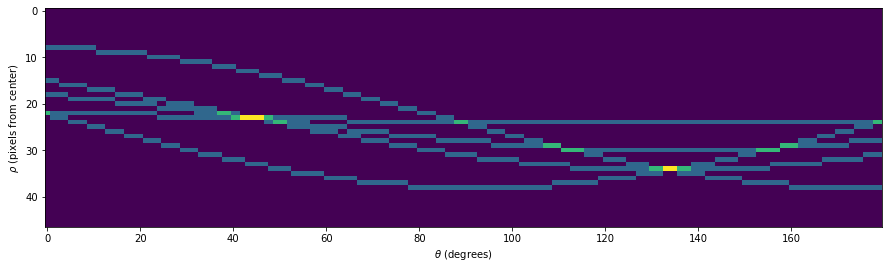

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [2. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 2. 2. 3. 3. 3. 3. 3. 2. 2. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 2.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 2. 2. 2. 3. 3. 3. 2. 2. 2. 1.]
 [1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [5]:
acc=np.zeros([47,180])

theta=np.arange(-89,91,1)
rho=np.round(np.cos(np.deg2rad(theta))+np.sin(np.deg2rad(theta))).astype(np.int32)
for x in range(theta.size):
    acc[rho[x]+23,theta[x]+89]=acc[rho[x]+23,theta[x]+89]+1

theta=np.arange(-89,91,1)
rho=np.round(5*np.cos(np.deg2rad(theta))+5*np.sin(np.deg2rad(theta))).astype(np.int32)
for x in range(theta.size):
    acc[rho[x]+23,theta[x]+89]=acc[rho[x]+23,theta[x]+89]+1

theta=np.arange(-89,91,1)
rho=np.round(8*np.cos(np.deg2rad(theta))+8*np.sin(np.deg2rad(theta))).astype(np.int32)
for x in range(theta.size):
    acc[rho[x]+23,theta[x]+89]=acc[rho[x]+23,theta[x]+89]+1

theta=np.arange(-89,91,1)
rho=np.round(np.cos(np.deg2rad(theta))+15*np.sin(np.deg2rad(theta))).astype(np.int32)
for x in range(theta.size):
    acc[rho[x]+23,theta[x]+89]=acc[rho[x]+23,theta[x]+89]+1

theta=np.arange(-89,91,1)
rho=np.round(15*np.cos(np.deg2rad(theta))+np.sin(np.deg2rad(theta))).astype(np.int32)
for x in range(theta.size):
    acc[rho[x]+23,theta[x]+89]=acc[rho[x]+23,theta[x]+89]+1

plt.figure(figsize=(15, 5))
plt.imshow(acc)
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\rho$ (pixels from center)')
plt.show()

w_half=5;
rho_line2=np.round(8*np.cos(np.deg2rad(45))+8*np.sin(np.deg2rad(45))).astype(np.int32)
print(acc[23+        0-w_half:23+        0+w_half+1, 89-45-w_half:89-45+w_half+1])
print(acc[23+rho_line2-w_half:23+rho_line2+w_half+1, 89+45-w_half:89+45+w_half+1])

So we get maxima in the accumulator matrix at two locations. The line with parameters rho=0 and theta=-45 degrees corresponds to the line with parameters a=1 and b=0, while the line with parameters:

rho=round(8*cosd(45)+8*sind(45))=round(8*sqrt(2)/2+8*sqrt(2)/2)=round(8*sqrt(2))=round(11.3)=11

and theta=45 degrees corresponds to the line with parameters a=-1 and b=16.

## Hough transform example 2

Start by making an image consisting of two lines with 7 connected points.

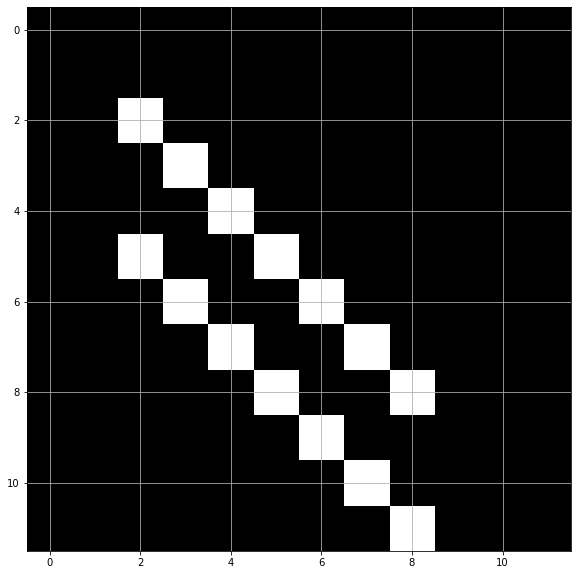

In [6]:
i=np.zeros([12,12]).astype(np.uint8)
for j in range(2,9):
  i[j,j]=1
  i[j+3,j]=1

plt.figure(figsize=(10, 10))
plt.imshow(i, cmap='gray')
plt.grid()
plt.show()

Use the OpenCV function HoughLines() to find the parameters of these lines using polar representation. If you have newer Python binding for OpenCV (>=4.5.2) and want to inspect the accumulator matrix, then you can use the function HoughLinesWithAccumulator() which will give you the accumulator in addition.

In [7]:
lines = cv2.HoughLines(i,
                       rho=1, # Distance resolution of the accumulator [pixels]
                       theta=np.pi/180, # Angle resolution [radians]
                       threshold=6)
rho = lines[:, 0, 0]
theta = np.round(lines[:, 0, 1]*180/np.pi)

print(rho)
print(theta)

[3. 0. 2.]
[130. 133. 134.]


We see that good approximations of the two lines are found. Specifically, a good approximation to the line with parameters rho=0 and theta=135 degrees are found, while two good approximations to the line with parameters rho=2.1 and theta=135 degrees are found (the rho of the latter line is about 2.1 because the point on this line that is closest to origo is [1.5,-1.5] and sqrt(1.5^2 + 1.5^2) is about 2.1). Looking at the image of the points (or the [x,y] coordinates of the points), we see that this is correct except that theta=45 in our definition of the polar representation. The reason for this difference is that the HoughLines() function uses a definition of the angle described by theta that differs from the definition used in the lecture on Hough transform; strictly speaking, it is not the definition of angle that differs, but rather what is defined to be the x-axis and y-axis (the HoughLines() function uses that the x-axis is a horizontal line increasing from coordinate [0,0] to the right, while the y-axis is a vertical line increasing from coordinate [0,0] and down).

Let's now remove 2 points from each line in the original image to investigate whether this hampers our ability to detect the lines.

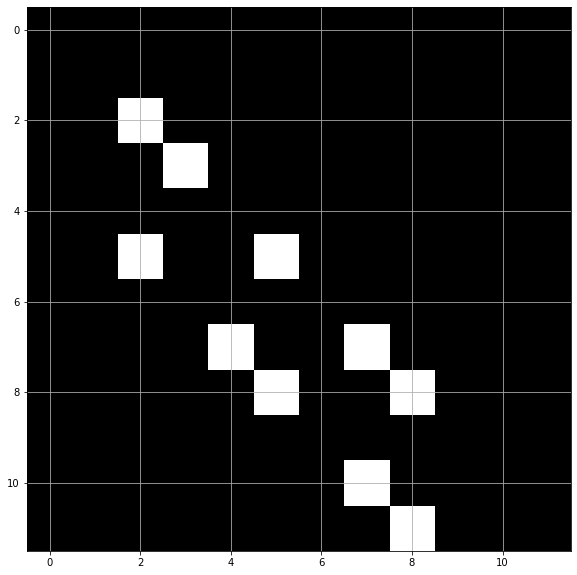

In [8]:
i[4,4]=0;
i[6,6]=0;

i[3+3,3]=0;
i[6+3,6]=0;

plt.figure(figsize=(10, 10))
plt.imshow(i, cmap='gray')
plt.grid()
plt.show()

Again use the OpenCV function HoughLines() to find the parameters of these lines using polar representation.

In [9]:
lines = cv2.HoughLines(i,
                       rho=1, # Distance resolution of the accumulator [pixels]
                       theta=np.pi/180, # Angle resolution [radians]
                       threshold=4)
rho = lines[:, 0, 0]
theta = np.round(lines[:, 0, 1]*180/np.pi)

print(rho)
print(theta)

[3. 0. 2.]
[130. 133. 134.]


We see that the three same approximations of the two lines are found as in the case where the lines consisted of 7 connected points.

## Hough transform example 3

Start by reading an image of a corridor.

In [10]:
i=cv2.imread('corridor.png')
ig=cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(15, 10))
plt.imshow(ig, cmap='gray')
plt.show()

Threshold the gradient magnitude image to obtain an edge image.

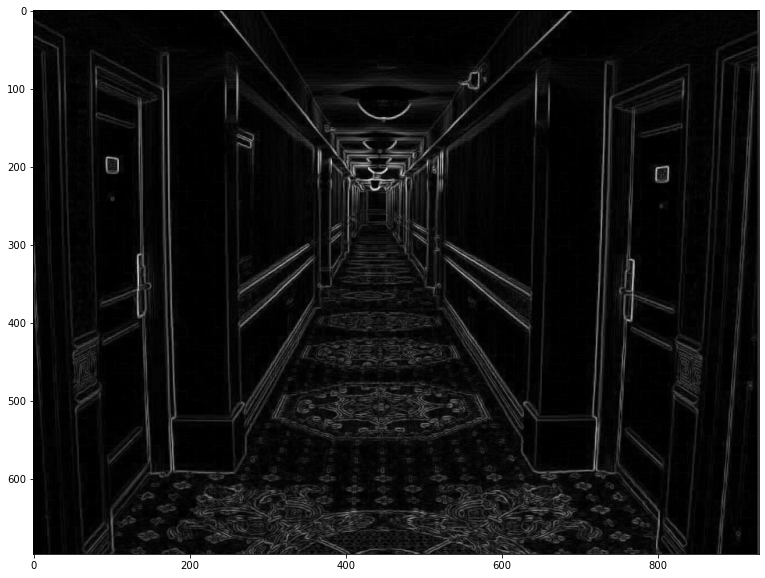

In [11]:
h1 = np.array([[1, 2, 1],
               [0, 0, 0],
               [-1, -2, -1]])
h2 = h1.T
igh = cv2.filter2D(ig, ddepth=cv2.CV_32F, kernel=h1, borderType=cv2.BORDER_REPLICATE) # An alternative is to use
igv = cv2.filter2D(ig, ddepth=cv2.CV_32F, kernel=h2, borderType=cv2.BORDER_REPLICATE) # the function cv2.Sobel()
igm = np.sqrt(igh**2+igv**2)

plt.figure(figsize=(15, 10))
plt.imshow(igm, cmap='gray')
plt.show()

igmT=(igm>120).astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(igmT, cmap='gray')
plt.show()

Let's plot the accumulator matrix. If you have newer Python binding for OpenCV (>=4.5.2), then the approach below could be simplified by using the function HoughLinesWithAccumulator().

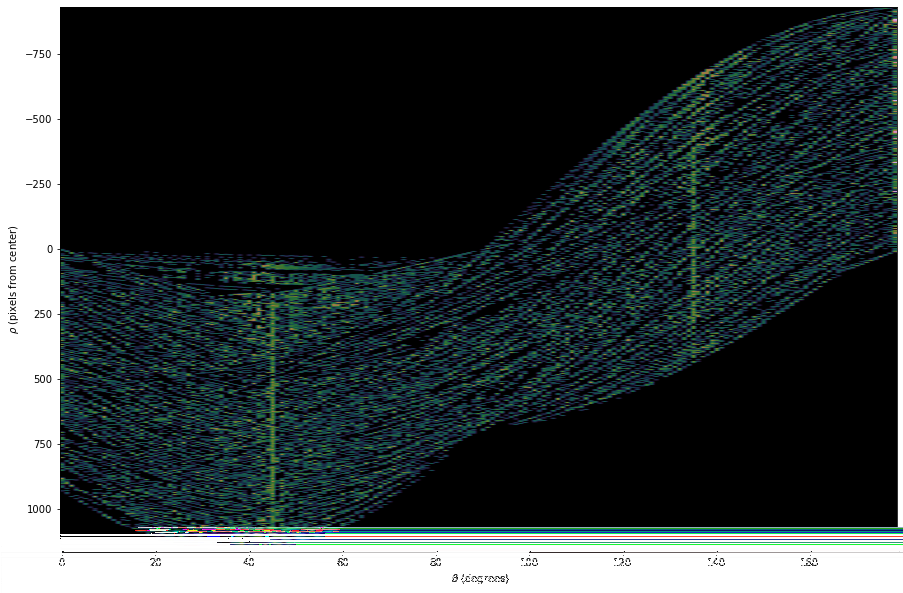

In [12]:
ill_lines = cv2.HoughLines(igmT,
                           rho=1, # Distance resolution of the accumulator [pixels]
                           theta=np.pi/180, # Angle resolution [radians]
                           threshold=0)
ill_rho = ill_lines[:, 0, 0]
ill_theta = np.round(ill_lines[:, 0, 1]*180/np.pi)

rho_edges=np.arange(np.min(ill_rho),np.max(ill_rho)+1,1)
theta_edges=np.arange(0,180,1)
heatmap, xedges, yedges = np.histogram2d(ill_rho, ill_theta, bins=(rho_edges, theta_edges))
extent = [theta_edges[0], theta_edges[-1], rho_edges[-1], rho_edges[0]]

plt.figure(figsize=(15, 10))
plt.imshow(heatmap, cmap='cubehelix', extent=extent, aspect='auto')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel(r'$\rho$ (pixels from center)')
plt.show()

Use the OpenCV function HoughLines() to find the parameters of lines in the image using polar representation.

In [13]:
lines = cv2.HoughLines(igmT,
                       rho=1, # Distance resolution of the accumulator [pixels]
                       theta=np.pi/180, # Angle resolution [radians]
                       threshold=235)
rho = lines[:, 0, 0]
theta = np.round(lines[:, 0, 1]*180/np.pi)

print(rho)
print(theta)

[ 736.  743. -170. -164.  478.  173.  733. -129. -135. -186.  777.  928.
 -158. -156.  484.  926.  -95. -220.  748.  928.]
[  2.   2. 179. 179.  46.   0.   1. 178. 179. 141.   3.   0. 178. 135.
  45.   4. 130. 145.   3.   4.]


Draw the full lines in red on top of the image.

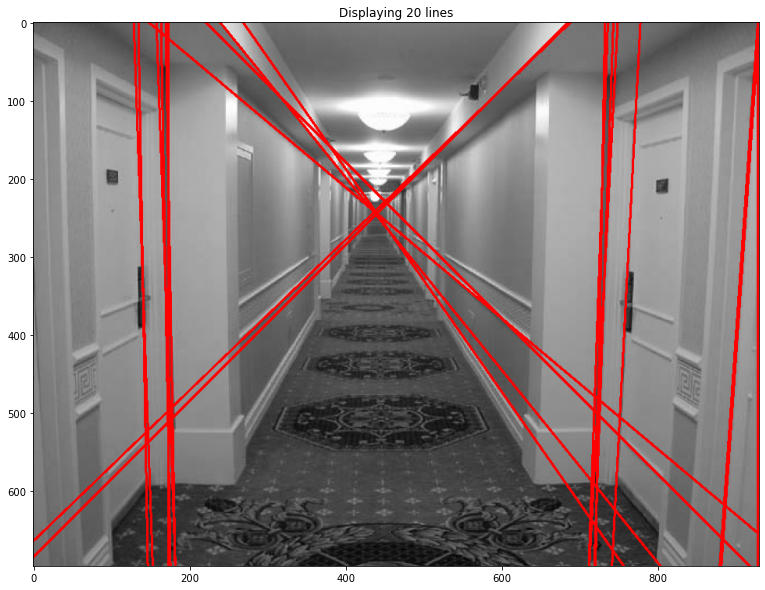

In [14]:
lined_image = cv2.cvtColor(ig, cv2.COLOR_GRAY2BGR)
line_length = 2000
num_lines = 0
for rho, theta in lines[:, 0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + line_length*(-b))
    y1 = int(y0 + line_length*(a))
    x2 = int(x0 - line_length*(-b))
    y2 = int(y0 - line_length*(a))

    cv2.line(lined_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    num_lines += 1
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(lined_image, cv2.COLOR_BGR2RGB))
plt.title(f'Displaying {num_lines} lines')
plt.show()